In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
keywords_df = pd.read_excel("keywords_cleaned.xlsx")
articles_df = pd.read_csv("bbc_preprocessed.csv")
#keywords_df.head()
#articles_df.head()

In [3]:
#keywords_df = pd.read_excel("/Users/josefelixvelascobarbachano/Desktop/MIT 2 - Fall 2024/Advanced/Project/keywords_cleaned.xlsx")
#articles_df = pd.read_csv("/Users/josefelixvelascobarbachano/Desktop/MIT 2 - Fall 2024/Advanced/Project/bbc_preprocessed.csv")
#keywords_df.head()
#articles_df.head()

### Extract Key Words

In [4]:
# iterate over keyword rows
cols = ["Keyword Priority {}".format(i) for i in range(1, 5)]
theme_dict = dict()
for index, row in keywords_df.iterrows():
  theme_dict[row["Themes"]] = dict()
  for col in cols:
    word_list = row[col].split(",")
    cleaned_list = []
    for word in word_list:
      word = word.lower().strip()
      cleaned_list.append(word)
      if word.endswith("s") and len(word) > 4:
        word = word[:-1]
        cleaned_list.append(word)
    theme_dict[row["Themes"]][col] = cleaned_list

keywords_all = []
for theme in theme_dict:
  for priority in theme_dict[theme]:
    keywords_all.extend(theme_dict[theme][priority])



### Classification of Articles into Themes

In [5]:
#calculate the TFIDF for each key word in each article
tf_idf_dicts = []

idf_dict = dict()
num_articles = len(articles_df)
for keyword in keywords_all:
  count = articles_df["content"].str.contains(keyword).sum()
  idf_dict[keyword] = np.log(num_articles / (count + 1e-5))

for _, row in articles_df.iterrows():
    content = str(row["content"])
    tf_idf_row = {}
    for keyword in keywords_all:
        tf = content.count(keyword)
        tf_idf_row[keyword] = tf*idf_dict[keyword]
    
    tf_idf_dicts.append(tf_idf_row)

# Create TF-IDF DataFrame
tf_idf_df = pd.DataFrame(tf_idf_dicts)
tf_idf_df.head()

,battery,ev,charging,sustainability,electric motor,lithium,climate change,zero emission,hybrid,plugin,...,bandwidth,virtual event,digital rights management,content delivery network,pay-per-view,content,sport,movie,show,proprietary content
0,0.0,0.192017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0
1,0.0,0.096008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0
2,0.0,0.288025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.114797,0.0,2.16216,0.0
3,0.0,0.192017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.08108,0.0
4,0.0,0.240021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0


In [6]:
#Calculate the average TFIDF score for each priority group in a theme for each article
themes = theme_dict.keys()
priorities = [f"Keyword Priority {i}" for i in range(1, 5)]
cols = [f"{theme}: {i}" for theme in themes for i in range(1, 5) ]

score_df = pd.DataFrame(index=tf_idf_df.index, columns=cols)
for theme in themes:
    for i in range(1, 5):
        keywords = theme_dict[theme][f"Keyword Priority {i}"]
        score_df[f"{theme}: {i}"] = tf_idf_df[keywords].mean(axis=1)

score_df.head()

,Electric Vehicles: 1,Electric Vehicles: 2,Electric Vehicles: 3,Electric Vehicles: 4,Smartphone: 1,Smartphone: 2,Smartphone: 3,Smartphone: 4,Cyber Security: 1,Cyber Security: 2,...,Transistors: 3,Transistors: 4,AR/VR: 1,AR/VR: 2,AR/VR: 3,AR/VR: 4,Streaming: 1,Streaming: 2,Streaming: 3,Streaming: 4
0,0.038403,0.0,0.000000,0.0,0.064489,0.116224,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.019202,0.0,0.000000,0.0,0.018425,0.000000,0.0,0.589817,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.057605,0.0,0.437197,0.0,0.027638,0.750461,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.855391
3,0.038403,0.0,0.000000,0.0,0.018425,0.174336,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216216
4,0.048004,0.0,0.000000,0.0,0.055276,0.058112,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [7]:
# Find overall theme score for each article by summing priorities
theme_score_df = pd.DataFrame({
    theme: score_df[[f"{theme}: {i}" for i in range(1, 5)]].sum(axis=1)
    for theme in themes
})
theme_score_df.head()

,Electric Vehicles,Smartphone,Cyber Security,Data Science/ML/AI,Smartwatch,Cloud Computing,Social Media,Transistors,AR/VR,Streaming
0,0.038403,0.180713,0.0,0.0,0.085149,0.0,5.280888,0.0,0.0,0.000000
1,0.019202,0.608242,0.0,0.0,0.170299,0.0,0.072536,0.0,0.0,0.000000
2,0.494802,0.778099,0.0,0.0,0.255448,0.0,0.072536,0.0,0.0,0.855391
3,0.038403,0.192762,0.0,0.0,0.170299,0.0,0.290143,0.0,0.0,0.216216
4,0.048004,0.113388,0.0,0.0,0.255448,0.0,0.221084,0.0,0.0,0.000000


In [8]:
#theme with highest score for each article
theme_score_df['theme'] = theme_score_df[themes].idxmax(axis=1)
theme_score_df.head()


,Electric Vehicles,Smartphone,Cyber Security,Data Science/ML/AI,Smartwatch,Cloud Computing,Social Media,Transistors,AR/VR,Streaming,theme
0,0.038403,0.180713,0.0,0.0,0.085149,0.0,5.280888,0.0,0.0,0.000000,Social Media
1,0.019202,0.608242,0.0,0.0,0.170299,0.0,0.072536,0.0,0.0,0.000000,Smartphone
2,0.494802,0.778099,0.0,0.0,0.255448,0.0,0.072536,0.0,0.0,0.855391,Streaming
3,0.038403,0.192762,0.0,0.0,0.170299,0.0,0.290143,0.0,0.0,0.216216,Social Media
4,0.048004,0.113388,0.0,0.0,0.255448,0.0,0.221084,0.0,0.0,0.000000,Smartwatch


In [9]:
themes = pd.concat([articles_df['date'], theme_score_df["theme"]], axis=1)
themes.head()

,date,theme
0,2017-01-01,Social Media
1,2017-01-01,Smartphone
2,2017-01-01,Streaming
3,2017-01-01,Social Media
4,2017-01-02,Smartwatch


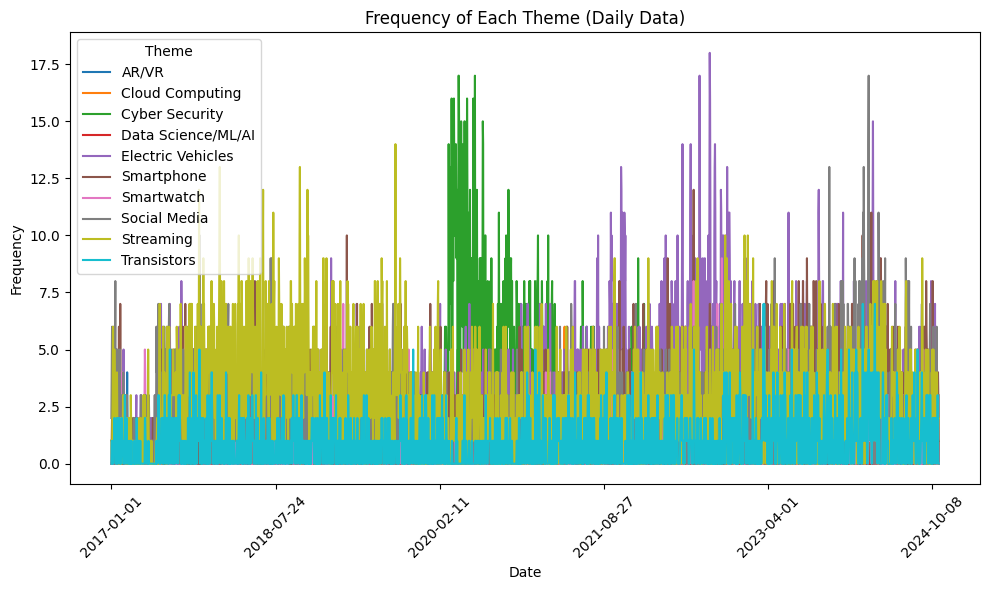

In [10]:
grouped = themes.groupby(['date', 'theme']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='date', columns='theme', values='count').fillna(0)

pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Frequency of Each Theme (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Theme')

plt.tight_layout()
plt.show()



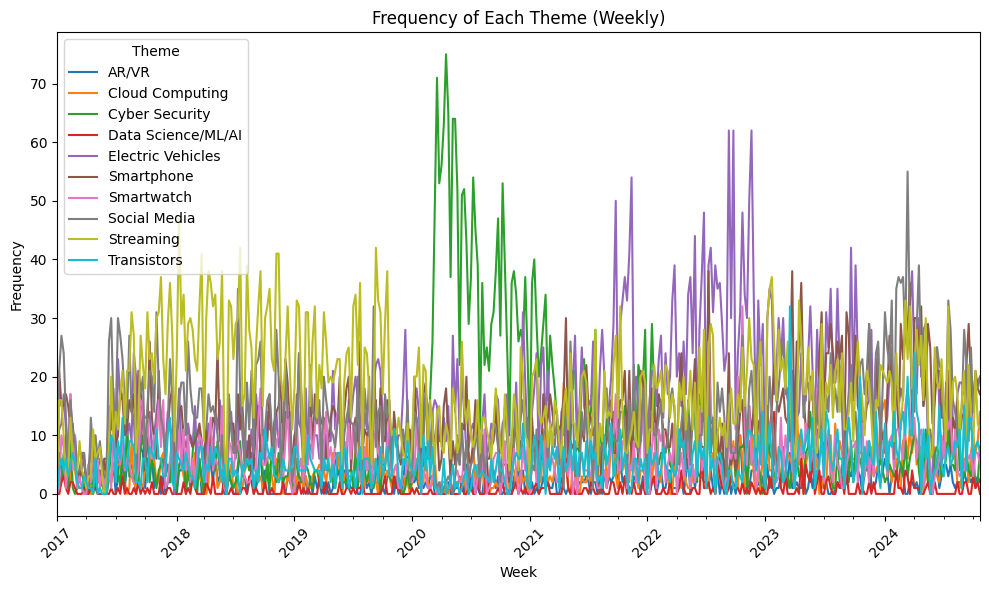

In [11]:
themes['date'] = pd.to_datetime(themes['date'])
themes['week'] = themes['date'].dt.to_period('W')  # Create a 'week' column
grouped = themes.groupby(['week', 'theme']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='week', columns='theme', values='count').fillna(0)

pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Frequency of Each Theme (Weekly)')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Theme')

plt.tight_layout()
plt.show()



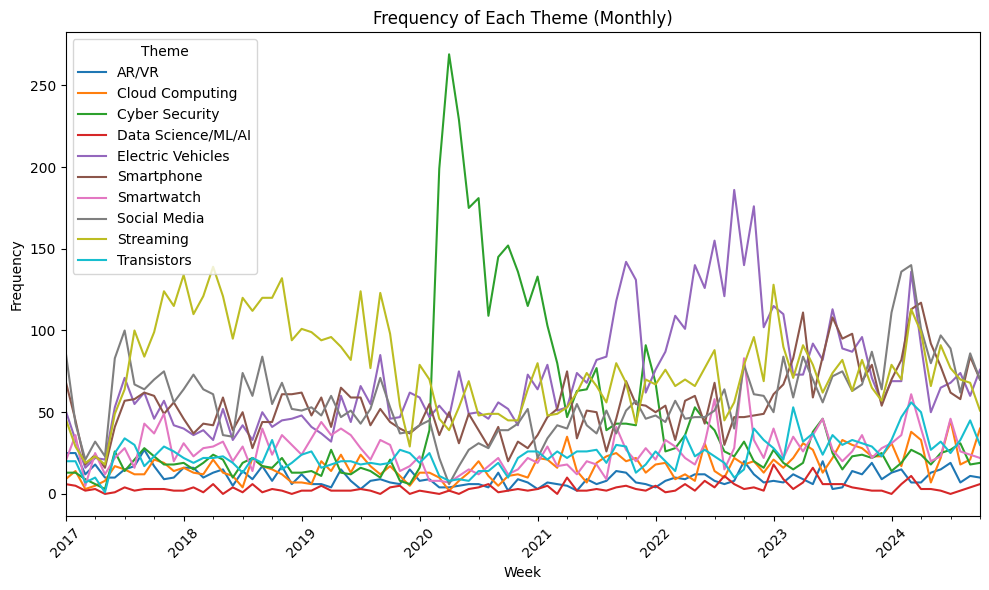

In [12]:
themes['date'] = pd.to_datetime(themes['date'])
themes['month'] = themes['date'].dt.to_period('M')  # Create a 'month' column
grouped = themes.groupby(['month', 'theme']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='month', columns='theme', values='count').fillna(0)

pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Frequency of Each Theme (Monthly)')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Theme')

plt.tight_layout()
plt.show()

In [13]:
#this is not working
# pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10', alpha=0.8)

# # Customize the plot
# plt.title('Cumulative Frequency of Themes by Week', fontsize=16, fontweight='bold')
# plt.xlabel('Week', fontsize=12)
# plt.ylabel('Cumulative Frequency', fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.legend(title='Theme', fontsize=10)
# plt.grid(axis='y', alpha=0.3)

# # Show the plot
# plt.tight_layout()
# plt.show()

### Sentiment analysis

In [14]:
import torch
print(torch.backends.mps.is_available())  # Should return True if MPS is available
print(torch.backends.mps.is_built())      # Should also return True

device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
x = torch.tensor([1, 2, 3], device=device)
print(x)

True
True
tensor([1, 2, 3], device='mps:0')


In [15]:
from transformers import pipeline

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",           # this is a relatively small bert model
    device=0
)

/Users/chikro/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [16]:
# This is to check if the kernel crashes

result = sentiment_analyzer("This is a test sentence.", truncation=True, max_length=512)
print(result)

[{'label': 'neutral', 'score': 0.9998546838760376}]


In [17]:
# text cleaning

def text_cleaner(text):
    import re
    return re.sub(r'[^\x00-\x7F]+', '', text)  # removing non-ASCII characters

articles_df['cleaned_content'] = articles_df['content'].apply(text_cleaner)

In [18]:
# processing the data in chunks (still crashes)

def analyze_sentiment_batch(df):
    results = []
    for text in df['cleaned_content']:
        try:
            result = sentiment_analyzer(text, truncation=True, max_length=512)[0]
            results.append((result['label'], result['score']))
        except Exception as e:
            results.append(("ERROR", 0))  # Handle errors gracefully
    return results

batch_size = 10  
results = []

from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# Function to process a single batch
def process_batch(start_index, batch_size, df):
    batch = df.iloc[start_index:start_index + batch_size]
    return analyze_sentiment_batch(batch)

# Parallel processing
batch_indices = range(0, len(articles_df), batch_size)
results = []

with ThreadPoolExecutor() as executor:
    futures = {executor.submit(process_batch, i, batch_size, articles_df): i for i in batch_indices}
    with tqdm(total=len(futures), desc="Processing batches", unit="batch") as pbar:
        for future in as_completed(futures):
            results.extend(future.result())  # Add the batch results
            pbar.update(1)  # Update the progress bar for each completed batch

# Output
labels, scores = zip(*results)
articles_df['sentiment_result'] = labels
articles_df['sentiment_score'] = scores

Processing batches:   0%|          | 0/3619 [00:00<?, ?batch/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Processing batches: 100%|██████████| 3619/3619 [43:53<00:00,  1.37batch/s]


In [19]:
sentiment = articles_df[['date', 'sentiment_result', 'sentiment_score']]
sentiment["confidence"] = sentiment['sentiment_score']
sentiment['sentiment_score'] = sentiment[['confidence', 'sentiment_result']].apply(lambda x: x[0] if str(x[1]).upper() == "POSITIVE" else -x[0], axis=1)
sentiment["sentiment_score"] = sentiment[["sentiment_result", "sentiment_score"]].apply(lambda x: 0 if str(x[0]).upper() == "NEUTRAL" else x[1], axis=1)
sentiment.head()
                     

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_92169/1889083832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment["confidence"] = sentiment['sentiment_score']
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_92169/1889083832.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sentiment['sentiment_score'] = sentiment[['confidence', 'sentiment_result']].apply(lambda x: x[0] if str(x[1]).upper() == "POSITIVE" else -x[0], axis=1)
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_92169/1889083832.py:3: SettingWithCopyWarning

,date,sentiment_result,sentiment_score,confidence
0,2017-01-01,neutral,0.0,0.999686
1,2017-01-01,neutral,0.0,0.999748
2,2017-01-01,neutral,0.0,0.999081
3,2017-01-01,neutral,0.0,0.826926
4,2017-01-02,neutral,0.0,0.999112


### Saving Results

In [21]:
sentiment["date"] = pd.to_datetime(sentiment["date"])
results = pd.merge(themes, sentiment, on='date', how='left')
results.to_csv('Theme_Sentiment_Results.csv', index=False)

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_92169/3326965842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment["date"] = pd.to_datetime(sentiment["date"])


**Time v. sentiment analysis**

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_3259/4272399893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['date'] = pd.to_datetime(temp['date'])
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_3259/4272399893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['week'] = temp['date'].dt.to_period('W')


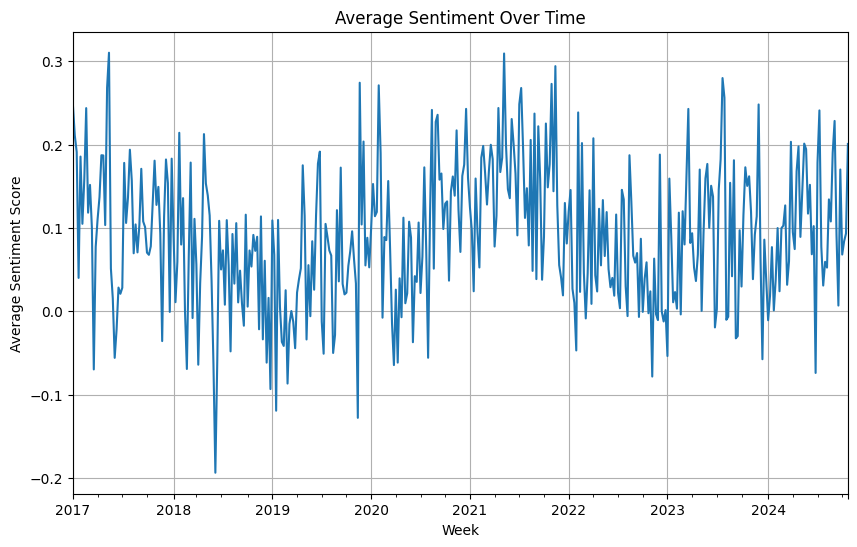

In [ ]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['week'] = sentiment['date'].dt.to_period('W')

# average sentiment by month
sentiment_trends = sentiment.groupby('week')['sentiment_score'].mean()

sentiment_trends.plot(kind='line', figsize=(10, 6), title='Average Sentiment Over Time')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.grid()
plt.show()



**Theme v. sentiment analysis**

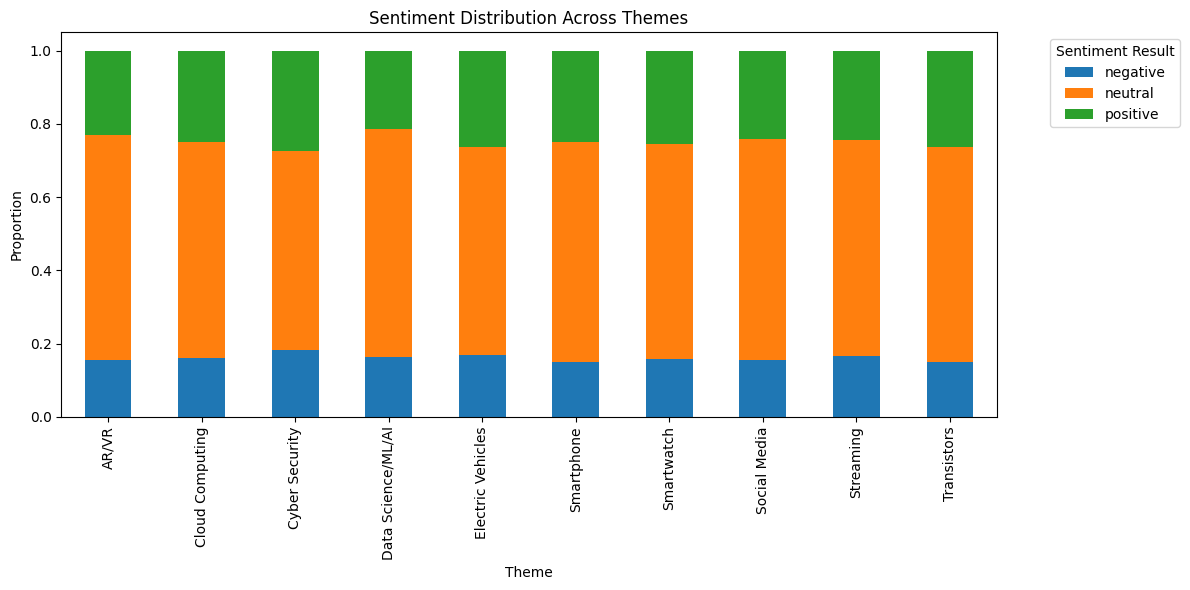

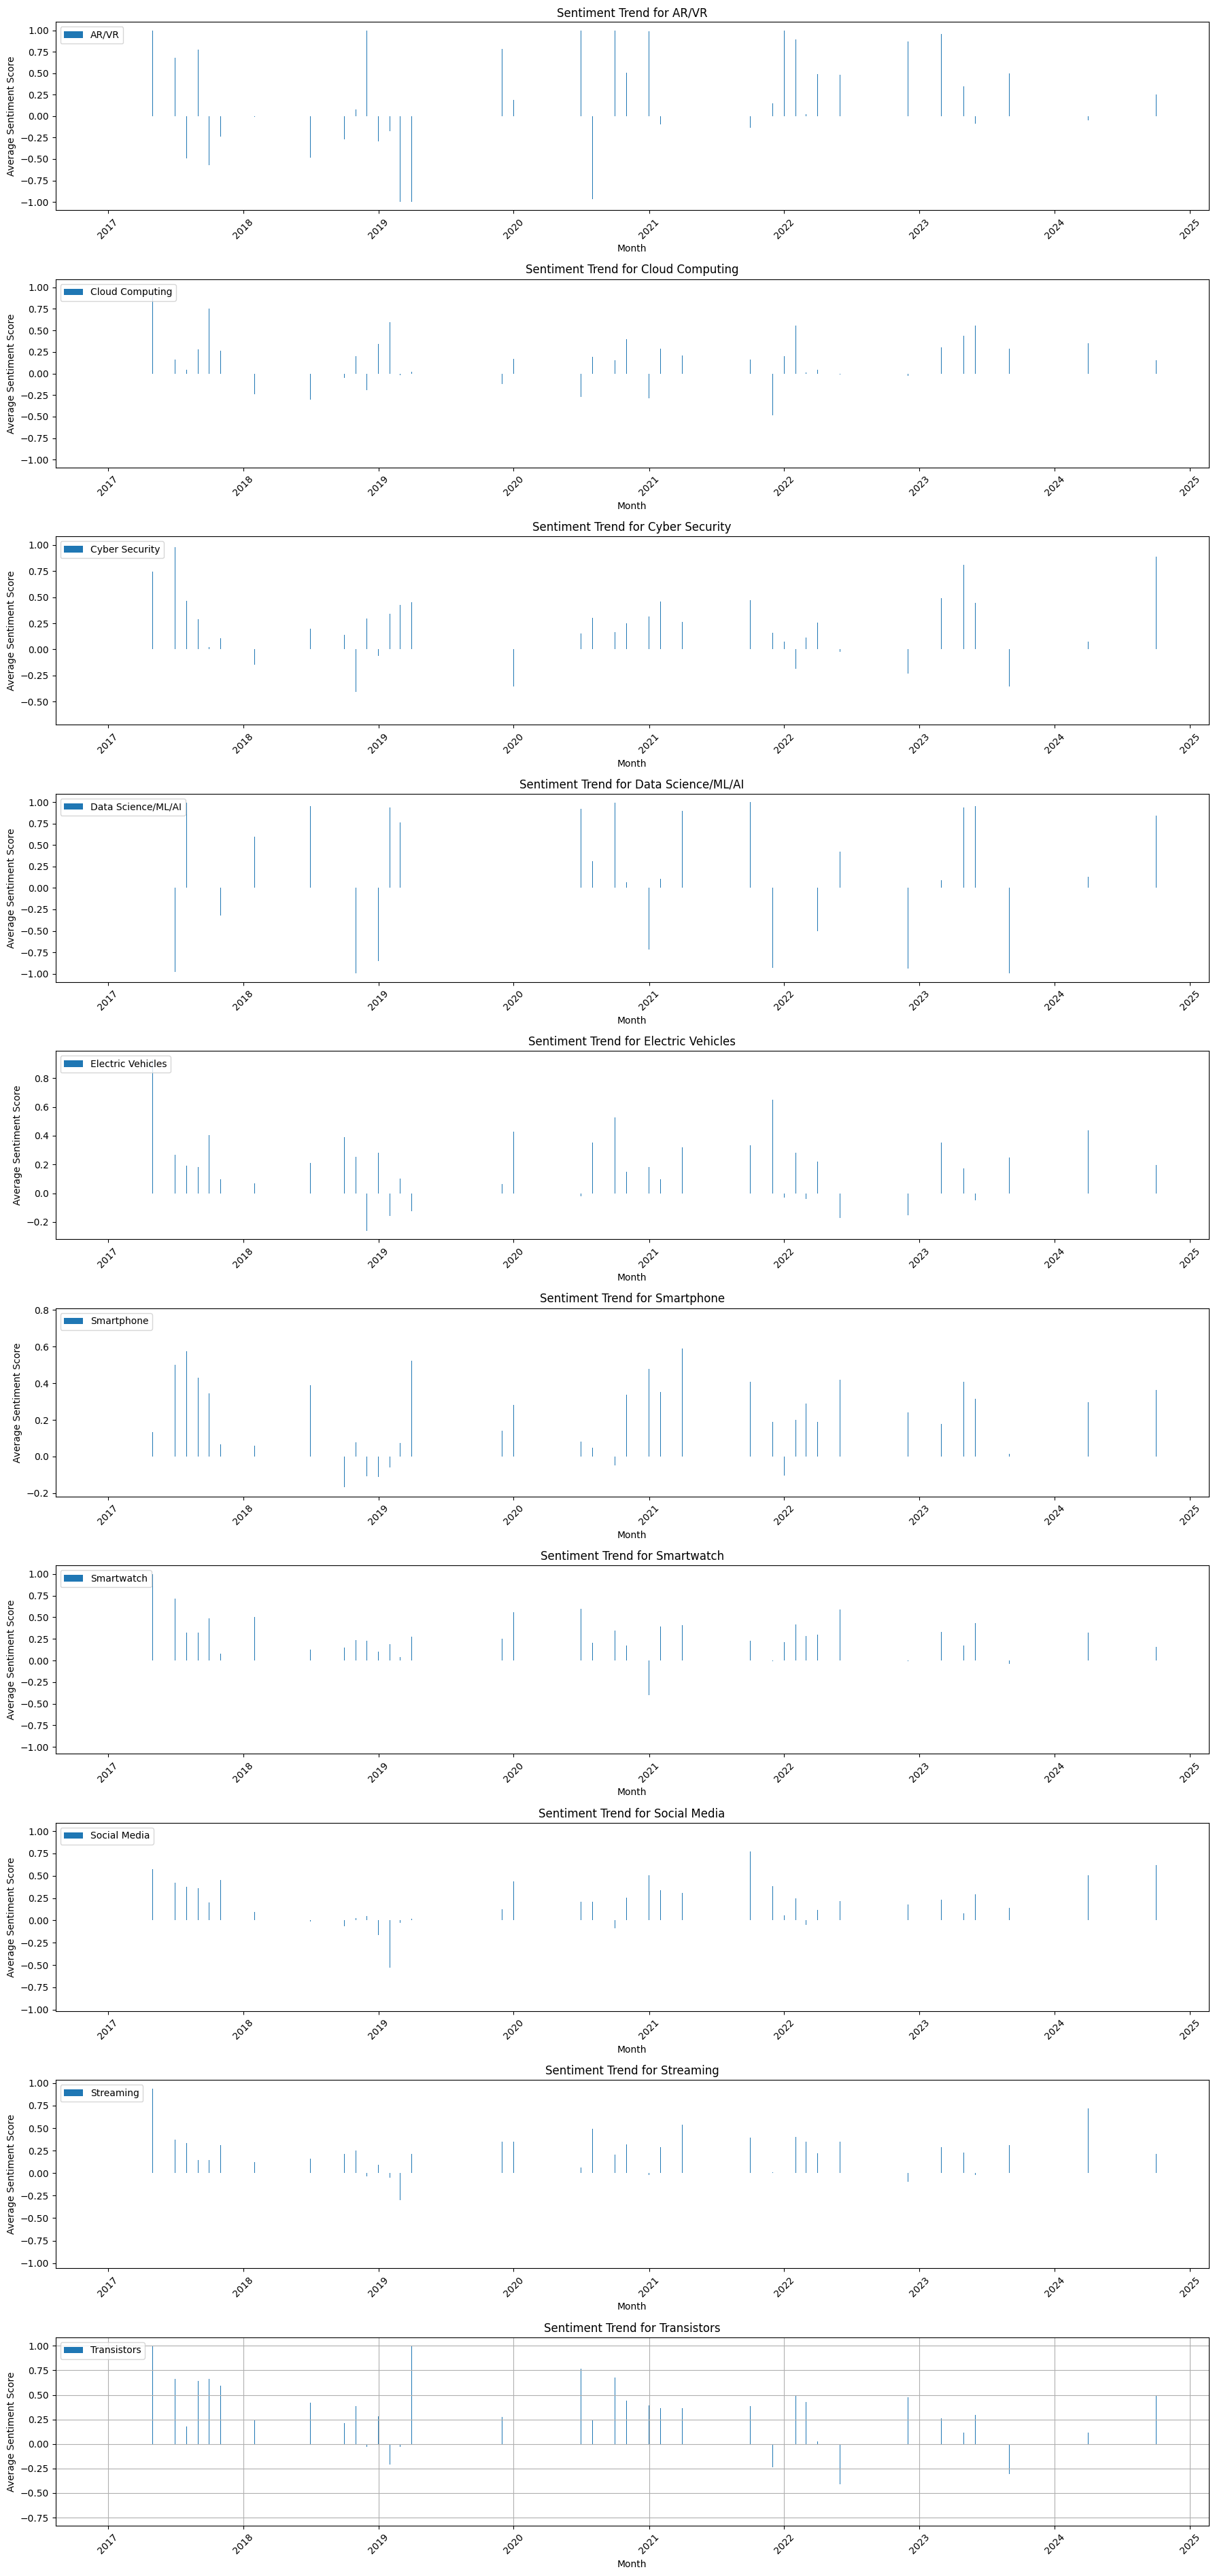

In [ ]:
combined_df = pd.concat([sentiment[['date', 'sentiment_score', 'sentiment_result']], theme_score_df['theme']], axis=1)
combined_df['date'] = pd.to_datetime(combined_df['date'])

theme_sentiment_group = combined_df.groupby(['theme', 'sentiment_result']).size().reset_index(name='count')

# Pivot 
theme_sentiment_pivot = theme_sentiment_group.pivot(index='theme', columns='sentiment_result', values='count').fillna(0)

# normalize as percentages
theme_sentiment_pivot = theme_sentiment_pivot.div(theme_sentiment_pivot.sum(axis=1), axis=0)

# sentiment distribution for each theme
theme_sentiment_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution Across Themes')
plt.xlabel('Theme')
plt.ylabel('Proportion')
plt.legend(title='Sentiment Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# sentiment scores over time by theme
combined_df = combined_df[combined_df["sentiment_result"].str.upper() != "NEUTRAL"]
combined_df['monthly'] = combined_df['date'].dt.to_period('M') 
monthly_sentiment_theme = combined_df.groupby(['monthly', 'theme'])['sentiment_score'].mean().reset_index()
"""
This needs to be average positivity per period, and average negativity per period (one line up, and one line down to show average of both categories per period).
Currently 
"""

# Pivot 
monthly_pivot = monthly_sentiment_theme.pivot(index='monthly', columns='theme', values='sentiment_score')

# sentiment trends over time for each theme
monthly_pivot.index = monthly_pivot.index.to_timestamp()

# Create subplots for each theme
num_themes = len(monthly_pivot.columns)
fig, axes = plt.subplots(num_themes, 1, figsize=(12, 4 * num_themes), sharex=False)

for ax, theme in zip(axes, monthly_pivot.columns):
    ax.bar(monthly_pivot.index, monthly_pivot[theme], label=theme)
    ax.set_title(f'Sentiment Trend for {theme}')
    ax.set_ylabel('Average Sentiment Score')
    ax.set_xlabel('Month')  # Add x-axis label for each subplot
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout(rect=[0, 0, 1.5, 0.95])  # Add extra padding at the bottom
plt.grid()
plt.show()

In [ ]:
print(f"theme_score_df: {theme_score_df.shape}")
print(f"articles_df: {articles_df.shape}")

theme_score_df: (36185, 11)
articles_df: (36185, 8)
